LATENT SEMANTIC ANALYSIS

LSA, büyük metin koleksiyonlarında bulunan belgelerin içerdikleri kelimeler arasındaki gizli semantik ilişkileri çıkarmak ve belgeleri daha düşük boyutlu bir uzayda temsil etmek amacıyla kullanılan bir doğal dil işleme tekniğidir. Bu yöntem, metinlerin içerdiği kelimelerin yoğunluk matrisini kullanarak belgeleri ve kelimeleri temsil eden bir matris oluşturur. Ardından, bu matrisi Singular Value Decomposition (SVD) ile üç bileşenli bir forma ayrıştırarak, belgeleri ve kelimeleri daha az boyutta bir uzayda temsil eden yeni öznitelikler elde eder.

LSA'nın en önemli özelliklerinden biri, kelime benzerliği ve anlam ilişkilerini belirleme yeteneğidir. Bu sayede, bir kelimenin benzer anlamlı kelimelerle ilişkisi belirlenebilir ve belgeler arasındaki benzerlik ölçülebilir. LSA, bilgi çıkarma, belge kümeleme, metin sınıflandırma gibi çeşitli uygulamalarda kullanılabilir. Metin madenciliği alanında gizli semantik ilişkileri keşfetmek ve belgeler arasındaki anlam ilişkilerini anlamak için etkili bir başlangıç noktası sunar.

1. Temel Fikir
Latent Semantic Analysis (LSA), büyük metin koleksiyonlarındaki belgelerin ve kelimelerin gizli semantik yapılarını keşfetmeye yönelik bir yöntemdir. Temel prensip, belge koleksiyonlarında geçen kelimeler arasındaki anlam ilişkilerini ortaya çıkarmaktır. Bu sayede, benzer anlamları paylaşan kelimelerin ve belgelerin gruplanmasına olanak tanır.

2. Terim-Frekans Matrisi
LSA'nın ilk adımı, belge koleksiyonundaki terim-frekans matrisini oluşturmaktır. Bu matris, belgelerin terimlerle olan ilişkisini gösterir. Satırlar belgeleri, sütunlar terimleri ve hücre değerleri belgelerdeki terimlerin frekanslarını içerir.

Örnek Terim-Frekans Matrisi:
          term1  term2  term3  ...  termN
document1   2      0      1           3
document2   0      1      4           0
...        ...    ...    ...        ...
documentM   1      3      0           2


3. SVD (Singular Value Decomposition)
SVD, terim-frekans matrisini üç başka matrisin çarpımı olarak açan bir matris ayrıştırma yöntemidir. Bu adım, belgeleri ve terimleri daha küçük boyutlu bir uzayda temsil eden gizli semantik yapıları ortaya çıkarır.

SVD'nin genel formülü:

A ≈ U * Σ * V^T



Burada, A orijinal terim-frekans matrisi, U ve V sırasıyla sol ve sağ tekil vektör matrisleri, Σ ise tekil değer matrisidir.

4. Boyut Azaltma
Elde edilen SVD sonuçlarından gelen özellik uzayını boyutlandırmak adımıdır. Bu, daha küçük boyutlu bir uzayda belge ve terim temsillerini elde etmenizi sağlar. Boyut azaltma, gizli semantik yapıları daha anlamlı ve yüksek özetleyici bir formda temsil eder.

5. Benzerlik ve Sınıflandırma
LSA tarafından üretilen temsillemeler, belgeler arasındaki benzerlikleri ölçmek ve metin sınıflandırma gibi görevlerde kullanmak için kullanılabilir. Özellikle, belge benzerlikleri genellikle benzer anlam taşıyan belgeleri bir araya getirmek ve arama motorlarında kullanmak için kullanılır.

LSA, metin madenciliği ve bilgi çıkarma uygulamalarında yaygın olarak kullanılan bir tekniktir. 

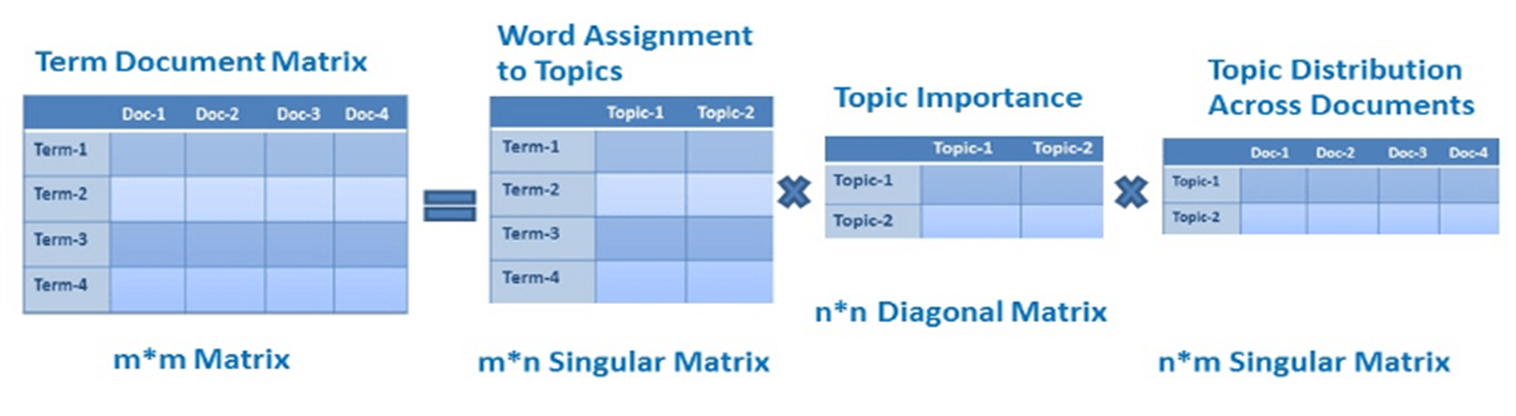

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

# Örnek metin belgeleri
documents = [
    "Python is a programming language",
    "Machine learning is a subset of artificial intelligence",
    "Natural language processing involves analyzing and understanding human language",
    "Data science combines domain knowledge, programming skills, and statistical methods",
    "Artificial intelligence is changing the world",
]

# TF-IDF vektörleme
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

print(X)


# LSA (Truncated SVD) uygulama
num_topics = 2
lsa = TruncatedSVD(n_components=num_topics)
lsa_result = lsa.fit_transform(X)

print(lsa_result)
# Her belgenin temsilini yazdırma
for i, doc in enumerate(documents):
    print(f"Belge {i + 1} - Temsil: {lsa_result[i]}")

# Belge benzerliğini ölçme
similarities = cosine_similarity(lsa_result, lsa_result)
print("\nBelge Benzerlikleri:")
for i in range(len(documents)):
    for j in range(i + 1, len(documents)):
        print(f"Belge {i + 1} ve Belge {j + 1}: {similarities[i, j]}")


  (0, 10)	0.5317722537280788
  (0, 16)	0.5317722537280788
  (0, 17)	0.6591180018251055
  (1, 7)	0.3889876106617681
  (1, 1)	0.3889876106617681
  (1, 21)	0.4821401170833009
  (1, 11)	0.4821401170833009
  (1, 12)	0.4821401170833009
  (2, 6)	0.34092454627167806
  (2, 22)	0.34092454627167806
  (2, 0)	0.34092454627167806
  (2, 8)	0.34092454627167806
  (2, 15)	0.34092454627167806
  (2, 14)	0.34092454627167806
  (2, 10)	0.5501115545929777
  (3, 13)	0.339992197464673
  (3, 20)	0.339992197464673
  (3, 19)	0.339992197464673
  (3, 9)	0.339992197464673
  (3, 5)	0.339992197464673
  (3, 3)	0.339992197464673
  (3, 18)	0.339992197464673
  (3, 4)	0.339992197464673
  (3, 16)	0.2743035641495426
  (4, 23)	0.5503291323968319
  (4, 2)	0.5503291323968319
  (4, 7)	0.44400207886377085
  (4, 1)	0.44400207886377085
[[-2.99975092e-17  8.14519592e-01]
 [ 8.20189800e-01  1.19933210e-17]
 [-2.73637506e-16  7.28926723e-01]
 [-7.50612648e-17  3.63466640e-01]
 [ 8.20189800e-01  4.55516082e-17]]
Belge 1 - Temsil: [-2.99